In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
data = pd.read_csv('credit_approval.csv')
data.head()

,Sex,Age,Debt,Married,Bank Costumer,Educational Level,Ethnicity,Years employed,Prior default,Employed,Credit score,Drivers Licence,Citizen,Zip code,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43,560.0,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120,0.0,+


In [7]:
data.describe(include=['O'])

,Sex,Age,Married,Bank Costumer,Educational Level,Ethnicity,Prior default,Employed,Drivers Licence,Citizen,Zip code,Approved
count,690,690,690,690,690,690,690,690,690,690,690,690
unique,3,350,4,4,15,10,2,2,2,3,171,2
top,b,?,u,g,c,v,t,f,f,g,0,-
freq,468,12,519,519,137,399,361,395,374,625,132,383


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 16 columns):
Sex                  692 non-null int32
Age                  692 non-null int32
Debt                 692 non-null float64
Married              692 non-null int32
Bank Costumer        692 non-null int32
Educational Level    692 non-null int32
Ethnicity            692 non-null int32
Years employed       692 non-null float64
Prior default        692 non-null int32
Employed             692 non-null int32
Credit score         692 non-null float64
Drivers Licence      692 non-null int32
Citizen              692 non-null int32
Zip code             692 non-null int32
Income               692 non-null float64
Approved             692 non-null int32
dtypes: float64(4), int32(12)
memory usage: 54.1 KB


In [11]:
import numpy as np

In [12]:
print(data.isnull().values.sum())

32


In [13]:
# Impute the missing values with mean imputation
data = data.fillna(data.mean())

# Count the number of NaNs in the dataset to verify

print(data.isnull().values.sum())

24


In [14]:
data.head()

,Sex,Age,Debt,Married,Bank Costumer,Educational Level,Ethnicity,Years employed,Prior default,Employed,Credit score,Drivers Licence,Citizen,Zip code,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43,560.0,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120,0.0,+


In [16]:
#missing value in non numeric column

print(data.info())
for col in data.columns:
    #check if col is obj type
    if data[col].dtypes == 'object':
        #impute with most freq value
        data[col] = data[col].fillna(data[col].value_counts().index[0])
        #count nans in dataset and print count to verify
print(data.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 16 columns):
Sex                  690 non-null object
Age                  690 non-null object
Debt                 692 non-null float64
Married              690 non-null object
Bank Costumer        690 non-null object
Educational Level    690 non-null object
Ethnicity            690 non-null object
Years employed       692 non-null float64
Prior default        690 non-null object
Employed             690 non-null object
Credit score         692 non-null float64
Drivers Licence      690 non-null object
Citizen              690 non-null object
Zip code             690 non-null object
Income               692 non-null float64
Approved             690 non-null object
dtypes: float64(4), object(12)
memory usage: 86.6+ KB
None
0


In [17]:
data.head()

,Sex,Age,Debt,Married,Bank Costumer,Educational Level,Ethnicity,Years employed,Prior default,Employed,Credit score,Drivers Licence,Citizen,Zip code,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43,560.0,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120,0.0,+


In [18]:
# Import LabelEncoder
# encoding object data type (conv non numeric to numeric)
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in data.columns:
    # Compare if the dtype is object
    if data[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        data[col]=le.fit_transform(data[col])

In [19]:
data.head()

,Sex,Age,Debt,Married,Bank Costumer,Educational Level,Ethnicity,Years employed,Prior default,Employed,Credit score,Drivers Licence,Citizen,Zip code,Income,Approved
0,2,156,0.000,2,1,13,8,1.25,1,1,1.0,0,0,42,0.0,0
1,1,328,4.460,2,1,11,4,3.04,1,1,6.0,0,0,118,560.0,0
2,1,89,0.500,2,1,11,4,1.50,1,0,0.0,0,0,74,824.0,0
3,2,125,1.540,2,1,13,8,3.75,1,1,5.0,1,0,1,3.0,0
4,2,43,5.625,2,1,13,8,1.71,1,0,0.0,0,2,8,0.0,0


features like DriversLicense and ZipCode are not as important as the other features in the dataset for predicting credit card approvals. We should drop them to design our machine learning model with the best set of features. This is often called feature engineering or, more specifically, feature selection.

In [36]:
# Drop features 10 and 13 and convert the DataFrame to a NumPy array
df=data.drop(['Drivers Licence', 'Zip code'], axis=1)

In [37]:
df.head()

,Sex,Age,Debt,Married,Bank Costumer,Educational Level,Ethnicity,Years employed,Prior default,Employed,Credit score,Citizen,Income,Approved
0,2,156,0.000,2,1,13,8,1.25,1,1,1.0,0,0.0,0
1,1,328,4.460,2,1,11,4,3.04,1,1,6.0,0,560.0,0
2,1,89,0.500,2,1,11,4,1.50,1,0,0.0,0,824.0,0
3,2,125,1.540,2,1,13,8,3.75,1,1,5.0,0,3.0,0
4,2,43,5.625,2,1,13,8,1.71,1,0,0.0,2,0.0,0


In [38]:
df.columns

Index(['Sex', 'Age', 'Debt', 'Married', 'Bank Costumer', 'Educational Level',
       'Ethnicity', 'Years employed', 'Prior default', 'Employed',
       'Credit score', 'Citizen', 'Income', 'Approved'],
      dtype='object')

In [44]:
df.to_csv('cleaned_data.csv')

In [39]:
X = df.iloc[:,0:13]
y= df.iloc[:,13]


In [42]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

C:\Users\Arjun\Miniconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Splitting the dataset into train and test sets

In [46]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(rescaledX,y)

In [53]:
# Import LogisticRegression

from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Making predictions and evaluating performance

In [54]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(X_test, y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test, y_pred)

Accuracy of logistic regression classifier:  0.8439306358381503


array([[72,  7],
       [20, 74]], dtype=int64)

Grid searching and making the model perform better

In [55]:


# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)
print(param_grid)


{'tol': [0.01, 0.001, 0.0001], 'max_iter': [100, 150, 200]}


Finding the best performing model

In [58]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.849711 using {'max_iter': 100, 'tol': 0.01}


In [59]:
from sklearn.svm import SVC

train = []
test = []
index = []

for C in [0.001, 0.01,0.1, 1, 10, 100]:
    for gamma in [0.001, 0.01,0.1, 1, 10, 100]:
        #create the model
        svc = SVC(kernel = 'rbf', C = C, gamma = gamma)
        
        #train the model
        svc.fit(X_train, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train, y_train))
        test.append(svc.score(X_test, y_test))
        index.append((C,gamma))

([<matplotlib.axis.XTick at 0x206d58b1898>,
 <a list of 36 Text xticklabel objects>)

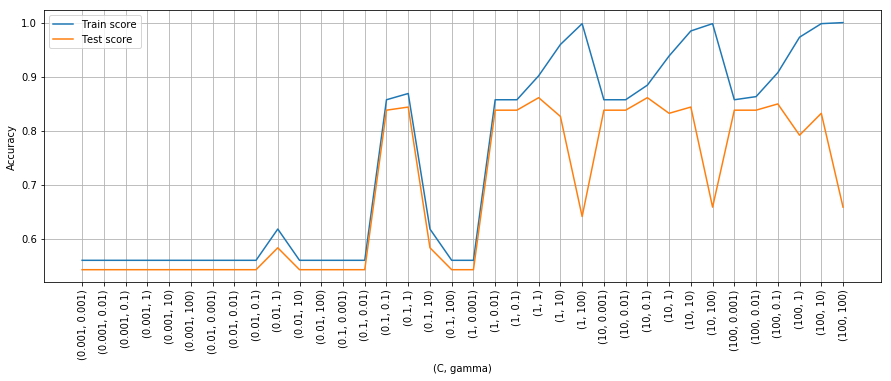

In [60]:
%matplotlib inline

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15,5))

plt.plot(range(len(index)), train, label = 'Train score')
plt.plot(range(len(index)), test, label = 'Test score')
plt.legend()
plt.grid()
plt.xlabel('(C, gamma)')
plt.ylabel('Accuracy')
plt.xticks(range(len(index)), index, rotation = 90)

In [61]:
svc = SVC(kernel = 'rbf', C = 1, gamma = 0.01)
svc.fit(X_train,y_train)
train_score = svc.score(X_train, y_train)
test_score = svc.score(X_test, y_test)

In [62]:
print(train_score)
print(test_score)

0.8574181117533719
0.838150289017341


In [63]:
from mlxtend.plotting import plot_decision_regions

X_2d = X[['Debt', 'Age']].iloc[50:100]
y_2d = y[50:100]

In [64]:
svc = SVC(kernel = 'rbf', C = 1, gamma = 1)

In [65]:
svc.fit(X_2d, y_2d)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

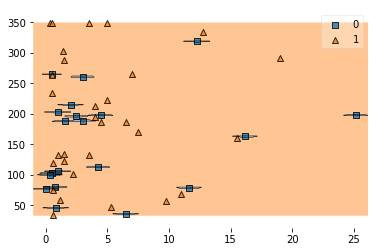

In [66]:
plot_decision_regions(X = np.array(X_2d), y = np.array(y_2d), clf = svc)